# Agenda 
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 


In [4]:
import metrics as m
import cv2
from metrics import mse, ssim, lbp_distance
import suport.patchesMethods as pm

In [5]:
# load the two input images result\57cb8af8.jpg
imageA = cv2.imread(r"result\\1bd1c8c771.png",0)
#imageB = cv2.imread(r"result\\57cb8af8.jpg",0)
imageB = cv2.imread(r"result\\73be8191.jpg",0)
# imageA = cv2.imread(r"result\\0bdd44d530.png")


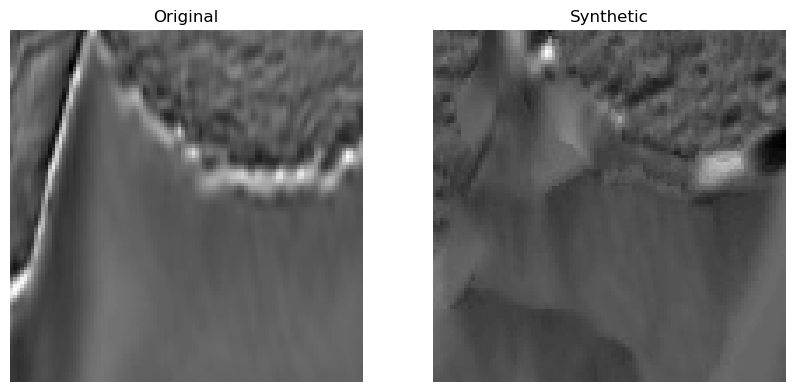

MSE: 702.7116949318694
Euclidean Distance: 0.43553540110588074
SSIM: 0.5197069453753913


In [3]:
images = [imageA,imageB]
titles = ["Original","Synthetic"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the SSIM between the two images
s = ssim(imageA, imageB)
# compute euclidean distance
euclidean_distance = lbp_distance(imageA, imageB)
print(f"MSE: {m}")
print(f"Euclidean Distance: {euclidean_distance}")
print(f"SSIM: {s}")

# Leitura de arquivo 

In [5]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, ssim, lbp_distance
import suport.patchesMethods as pm
import os

In [3]:
# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv', sep=';' , header=None)  # O CSV deve ter colunas, por exemplo: 'img1', 'img2'

MSE: 2385.39, SSIM: 0.35, LBPD: 1.05


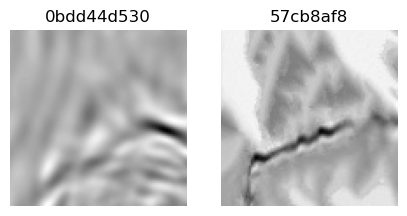

MSE: 1231.08, SSIM: 0.42, LBPD: 0.35


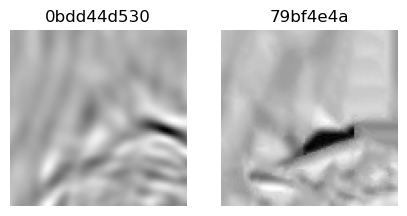

MSE: 1797.31, SSIM: 0.32, LBPD: 0.95


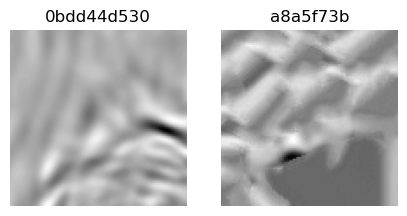

MSE: 2312.20, SSIM: 0.36, LBPD: 1.08


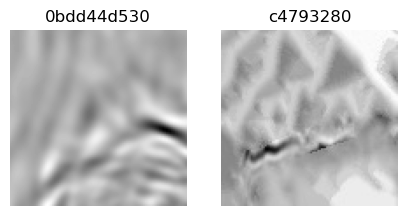

MSE: 596.85, SSIM: 0.44, LBPD: 0.54


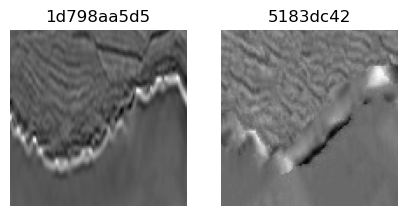

MSE: 630.49, SSIM: 0.44, LBPD: 0.51


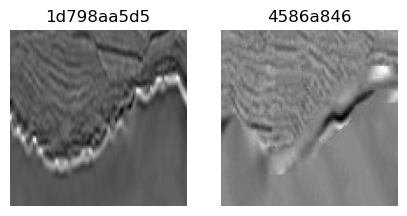

MSE: 597.40, SSIM: 0.43, LBPD: 0.46


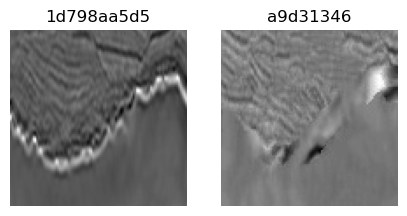

MSE: 563.84, SSIM: 0.44, LBPD: 0.58


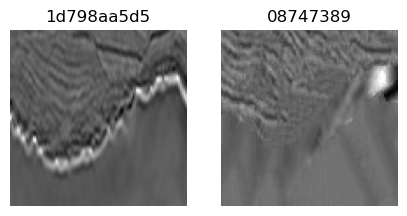

MSE: 734.40, SSIM: 0.41, LBPD: 0.54


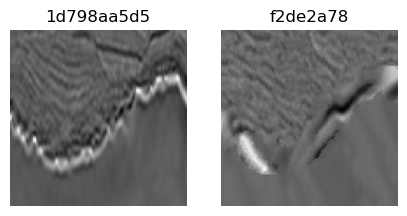

MSE: 648.96, SSIM: 0.43, LBPD: 0.52


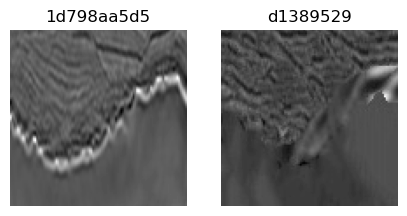

MSE: 702.71, SSIM: 0.52, LBPD: 0.44


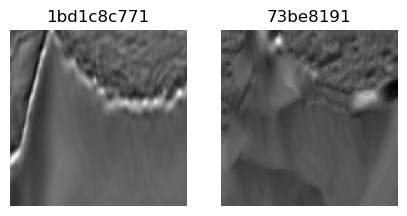

MSE: 762.44, SSIM: 0.49, LBPD: 0.52


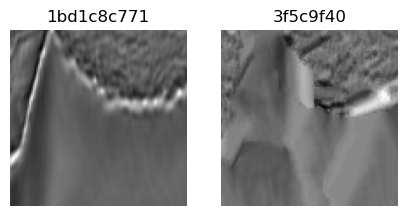

MSE: 730.83, SSIM: 0.49, LBPD: 0.55


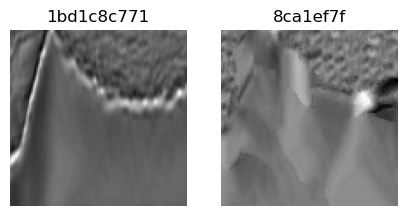

MSE: 764.25, SSIM: 0.49, LBPD: 0.57


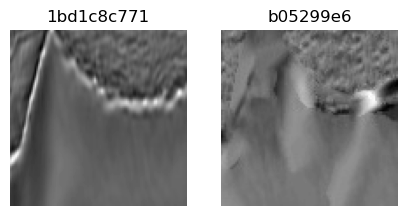

Min: 563.84, Q1: 635.10, Q2: 732.62, Q3: 1114.37, Mean: 1032.72
Min: 0.32, Q1: 0.41, Q2: 0.43, Q3: 0.48, Mean: 0.43
Min: 0.35, Q1: 0.51, Q2: 0.54, Q3: 0.58, Mean: 0.62


(np.float32(0.35007632),
 np.float32(0.5117371),
 np.float32(0.5408615),
 np.float32(0.5788163),
 np.float32(0.6185896))

In [ ]:
imageA = 0
imageB = 0
mse_values = []
ssim_values = []
lbp_distances = []


for i, row in df_imgs.iterrows():
    for j, value in enumerate(row):
        if pd.notnull(value):
            if j == 0:
                nomeOriginal = value
                original = f"tgs_salt\\{value}.png"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(original):
                    print(f"File not found: {original}")
                    continue
                imageA = cv2.imread(original,0)
            else:
                nomeImage = value
                sintese = f"result\\{value}.jpg"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(sintese):
                    print(f"File not found: {sintese}")
                    continue
                imageB = cv2.imread(sintese,0)
                mse_value = mse(imageA, imageB)
                s = ssim(imageA, imageB)
                euclidean_distance = lbp_distance(imageA, imageB)
                print(f"MSE: {mse_value:.2f}, SSIM: {s:.2f}, LBPD: {euclidean_distance:.2f}")
                images = [imageA, imageB]
                titles = [nomeOriginal, nomeImage]
                pm.showImages(images=images, imagesTitle=titles, size=(5,5))
                mse_values.append(mse_value)
                ssim_values.append(s)
                lbp_distances.append(euclidean_distance)


In [14]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(listValues):
    min = np.min(listValues)
    q1 = np.percentile(listValues, 25)
    q2 = np.median(listValues)
    q3 = np.percentile(listValues, 75)
    max = np.max(listValues)
    mean = np.mean(listValues)
    #print(f"Statistics for {len(listValues)} values:")
    print(f"Min: {min:.2f}, Q1: {q1:.2f}, Median: {q2:.2f}, Q3: {q3:.2f}, Max: {max:.2f}, Mean: {mean:.2f}")
    
    return min, q1, q2, q3, max,  mean



In [16]:
print(f"MSE")
statMSE= statistics(mse_values)
print(f"SSIM")
statSsim = statistics(ssim_values) 
print(f"LBP Distance")
staLBP = statistics(lbp_distances)

MSE
Min: 563.84, Q1: 635.10, Median: 732.62, Q3: 1114.37, Max: 2385.39, Mean: 1032.72
SSIM
Min: 0.32, Q1: 0.41, Median: 0.43, Q3: 0.48, Max: 0.52, Mean: 0.43
LBP Distance
Min: 0.35, Q1: 0.51, Median: 0.54, Q3: 0.58, Max: 1.08, Mean: 0.62


In [ ]:
results_df = pd.DataFrame({
    'MSE': mse_values,
    'SSIM': ssim_values,
    'LBP Distance': lbp_distances
})
results_df.to_csv('result\\metrics_results.csv', sep=';', index=False, float_format='%.2f')
# Exibir os resultados
print("Resultados salvos em 'result\\metrics_results.csv'.")

Resultados salvos em 'result\metrics_results.csv'.


In [20]:
# Salvar os valores mínimos, q1, mediana, q3 e máximo em um arquivo CSV separado por ponto e vírgula.
stats_df = pd.DataFrame({
    'MSE': statistics(mse_values),
    'SSIM': statistics(ssim_values),
    'LBP Distance': statistics(lbp_distances)
}, index=['Min', 'Q1', 'Q2', 'Q3', 'Max' , 'Mean']).T
stats_df.to_csv('result\\metrics_statistics.csv', sep=';', index=True, float_format='%.2f')
# Exibir os resultados  
print("Estatísticas salvas em 'result\\metrics_statistics.csv'.")


Min: 563.84, Q1: 635.10, Median: 732.62, Q3: 1114.37, Max: 2385.39, Mean: 1032.72
Min: 0.32, Q1: 0.41, Median: 0.43, Q3: 0.48, Max: 0.52, Mean: 0.43
Min: 0.35, Q1: 0.51, Median: 0.54, Q3: 0.58, Max: 1.08, Mean: 0.62
Estatísticas salvas em 'result\metrics_statistics.csv'.
